# Teste de algoritmos de detecção de faces

In [1]:
import numpy as np
import pandas as pd

# processamento de imagem
import cv2
from PIL import Image
import torch
import torchvision as tvis

# vis
import matplotlib.pyplot as plt
import matplotlib.patches as patches

/home/itsmeale/code/face-verification/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Carregando uma amostra das imagens

In [2]:
images_files = pd.read_parquet("../data/interim/images_paths.parquet").sample(10, random_state=1)

In [3]:
sample = images_files.values.flatten()
images = [tvis.io.read_image(f"../{path}") for path in sample]

In [4]:
# Resolução das imagens
print(set([im.shape for im in images]))

{torch.Size([3, 250, 250])}


Todas as imagens já estão na mesma resolução

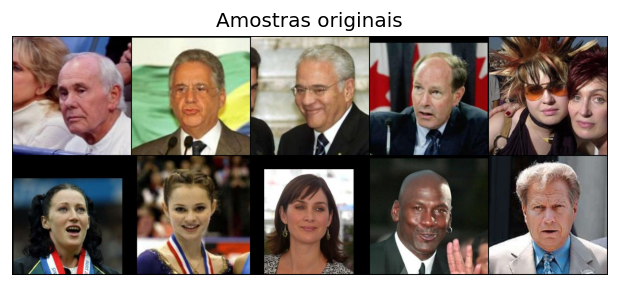

In [5]:
fig, ax = plt.subplots(dpi=120)
plt.imshow(tvis.utils.make_grid(images, nrow=5).permute((1, 2, 0)))
plt.axis(False)
plt.title("Amostras originais")
plt.show()

Aplicação do algoritmo de Viola & Jones com Haar cascades pré-treinadas

In [6]:
permuted_image = images[6].permute((1, 2, 0))

# converte imagem para escala de cinza
gray = cv2.cvtColor(permuted_image.numpy(), cv2.COLOR_BGR2GRAY)

# carrega o detector com as cascades pré-treinadas
detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# detecção das faces
faces = detector.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=2, flags=cv2.CASCADE_DO_CANNY_PRUNING)

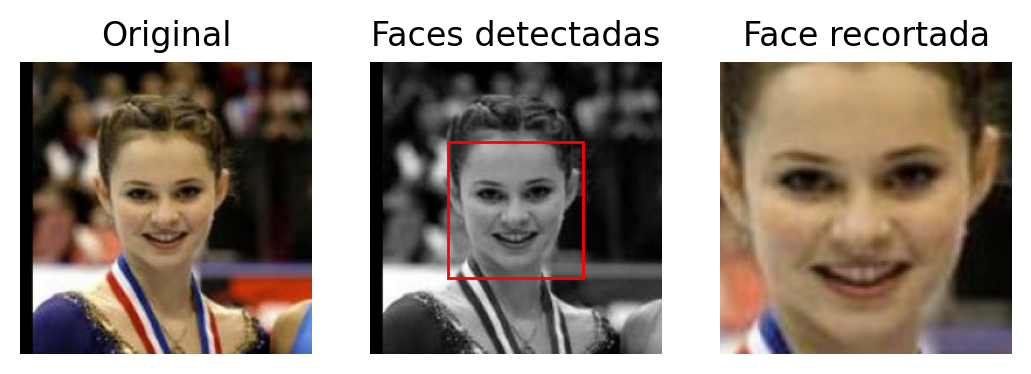

In [7]:
fig, ax = plt.subplots(1, 3, dpi=200)
x, y, w, h = faces[0]

rect1 = patches.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')

ax[0].imshow(permuted_image)
ax[0].axis(False)
ax[0].set_title("Original")

ax[1].imshow(gray, cmap='gray')
ax[1].axis(False)
ax[1].add_patch(rect1)
ax[1].set_title("Faces detectadas")

ax[2].imshow(permuted_image[x:x+w, y:y+h])
ax[2].axis(False)
ax[2].set_title("Face recortada")

plt.show()

---

# Avaliação do VJ

In [8]:
import json
import pandas as pd

In [9]:
with open("../data/interim/detected_faces.json", "r") as j:
    faces = json.loads(j.read())